In [1]:
import numpy as np
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan',
                   precision=8, suppress=False, threshold=3, formatter=None)

In [2]:
import pyrrhenius.database as phsd

In [3]:
ecdatabase = phsd.Database()

In [4]:
model = ecdatabase.get_model('SEO3_ol')

In [5]:
conductivity = model.get_conductivity(T=1000, P=1.0, logfo2=10**-11)
print('*'*20)
print('Calculated conductivity (S/m) at T=1000 K, P=1 GPa,and fO2=10^-11 bars:')
print(conductivity)

********************
Calculated conductivity (S/m) at T=1000 K, P=1 GPa,and fO2=10^-11 bars:
[2.73808615e-05]


In [6]:
import numpy as np

T = np.linspace(500,1500,num=11)
z = np.arange(0,11,1) # dummy variable for demonstration purposes only
tt, xx = np.meshgrid(T,z)
print(tt.shape)
tt

(11, 11)


array([[ 500.,  600.,  700., ..., 1300., 1400., 1500.],
       [ 500.,  600.,  700., ..., 1300., 1400., 1500.],
       [ 500.,  600.,  700., ..., 1300., 1400., 1500.],
       ...,
       [ 500.,  600.,  700., ..., 1300., 1400., 1500.],
       [ 500.,  600.,  700., ..., 1300., 1400., 1500.],
       [ 500.,  600.,  700., ..., 1300., 1400., 1500.]])

In [7]:
model.get_conductivity(T=tt, P=1.0, logfo2=10**-11)

array([[1.06820389e-10, 6.71262242e-09, 1.29536636e-07, ...,
        5.52272174e-04, 1.26077070e-03, 2.93431687e-03],
       [1.06820389e-10, 6.71262242e-09, 1.29536636e-07, ...,
        5.52272174e-04, 1.26077070e-03, 2.93431687e-03],
       [1.06820389e-10, 6.71262242e-09, 1.29536636e-07, ...,
        5.52272174e-04, 1.26077070e-03, 2.93431687e-03],
       ...,
       [1.06820389e-10, 6.71262242e-09, 1.29536636e-07, ...,
        5.52272174e-04, 1.26077070e-03, 2.93431687e-03],
       [1.06820389e-10, 6.71262242e-09, 1.29536636e-07, ...,
        5.52272174e-04, 1.26077070e-03, 2.93431687e-03],
       [1.06820389e-10, 6.71262242e-09, 1.29536636e-07, ...,
        5.52272174e-04, 1.26077070e-03, 2.93431687e-03]])

In [8]:
import pyrrhenius.database as phsd

ecdatabase = phsd.Database()

In [9]:
ecdatabase.get_phases()

['basalt',
 'basaltic melt',
 'brine',
 'clinopyroxene',
 'gabbro',
 'garnet',
 'granite',
 'granulite',
 'olivine',
 'omphacite',
 'orthopyroxene',
 'peridotite',
 'pervoskite',
 'phlogopite',
 'plagioclase',
 'schist',
 'wadsleyite',
 'silicate melt']

In [10]:
ecdatabase.get_model_list_for_phase('granite')

['ks_83_granite',
 'han_23_HD_granite',
 'han_23_QD_low_granite',
 'han_23_QD_high_granite',
 'han_23_QP_low_granite',
 'han_23_QP_high_granite']

In [11]:
ecmodel = ecdatabase.get_model('han_23_HD_granite')
ecmodel

han_23_HD_granite:{9.906(nan) exp( -1.22(0.063)/kT)}

In [12]:
before_isotropic_calculation = ecdatabase.get_model_list_for_phase('plagioclase')
ecdatabase.create_isotropic_models()
after_isotropic_calculation = ecdatabase.get_model_list_for_phase('plagioclase')
print('*'*20)
print('Before Isotropic Calculation')
print('*'*20)
print(*before_isotropic_calculation,sep='\n')
print('*'*20)
print('After Isotropic Calculation')
print('*'*20)
print(*after_isotropic_calculation,sep='\n')

********************


Before Isotropic Calculation
********************
yang_11a_plag
yang_12b_plag[100]
yang_12b_plag[010]
yang_12b_plag[001]
Li_18_dry_plag
Li_18_wet_plag
********************
After Isotropic Calculation
********************
yang_11a_plag
yang_12b_plag[100]
yang_12b_plag[010]
yang_12b_plag[001]
Li_18_dry_plag
Li_18_wet_plag
isotropic_model:yang_12b_plag[100]+yang_12b_plag[010]+yang_12b_plag[001]


In [13]:
ecmodel = ecdatabase.get_model('isotropic_model:yang_12b_plag[100]+yang_12b_plag[010]+yang_12b_plag[001]')
conductivity = ecmodel.get_conductivity(T=1000, P=1.0)
conductivity

array([0.00061567])

In [14]:
import pyrrhenius.mixing as pyhmix

brine_id = 'Li_18_1%plg_brine'
plag_id = 'isotropic_model:yang_12b_plag[100]+yang_12b_plag[010]+yang_12b_plag[001]'

brine_model = ecdatabase.get_model(brine_id)
plag_model  = ecdatabase.get_model(plag_id)

# The HashinStrikman mixing model needs to be initialized with a matrix and inclusion ecmodel
hashinshtrikman_matrix = pyhmix.HashinShtrikmanUpper(plag_model,brine_model)
# The Geometric Average model requires intitialization with a phase and phase fraction list.
geometric_mixed_matrix = pyhmix.GeomAverage(phases=[brine_model,plag_model],
                                            phase_fractions=[0.05,0.95])

# Only the HS model in this example requires a provided phase fraction (0.05), positional argument.
hs_conductivity = hashinshtrikman_matrix.get_conductivity(0.05,T=1000)
gm_conductivity = geometric_mixed_matrix.get_conductivity(T=1000)

# Also calculate endmember phase conductivities for comparison
plagioclase_conductivity = plag_model.get_conductivity(T=1000)
brine_conductivity        = brine_model.get_conductivity(T=1000)

print(f'HS: {hs_conductivity} GM:{gm_conductivity}')
print(f'Plag: {plagioclase_conductivity} Brine:{brine_conductivity}')

HS: [0.01280826] GM:[0.00084664]
Plag: [0.00061567] Brine:[0.36]


In [15]:
plag_model.metadata

isotropic_model:yang_12b_plag[100]+yang_12b_plag[010]+yang_12b_plag[001]
:title:None
	author:Xiaozhi Yang+Xiaozhi Yang+Xiaozhi Yang
	year:None
	doi:None
	phase_type:plagioclase
	description:None
	sample_type:None
	equation_form:None
	publication_id:Yang2012+Yang2012+Yang2012
	complete_or_partial_fit:None
	composite_or_single:None
	pressure_average:0.1
	pressure_min:None
	pressure_max:None
	temp_min:473.15
	temp_max:1073.15
	nacl_min:None
	nacl_max:None
	nacl_average:None
	na2o_min:None
	na2o_max:None
	na2o_average:None
	sio2_min:None
	sio2_max:None
	sio2_average:None
	co2_min:None
	co2_max:None
	co2_average:None
	water_min:95.0
	water_max:110.0
	water_average:102.5
	water_calibration:Johnson and Rossman (2003)
	water_units:ppm
	iron_min:None
	iron_max:None
	iron_average:None
	iron_units:nan
	crystal_direction:isotropic
	equation:mixture of:yang_12b_plag[100]*yang_12b_plag[010]*yang_12b_plag[001]
	ec_model:mixture of:yang_12b_plag[100]*yang_12b_plag[010]*yang_12b_plag[001]

In [16]:
plag_model.generate_representative_conditions()

{'T': array([ 473.15, 1073.15])}

In [17]:
condition_dict = plag_model.generate_representative_conditions()
plag_model.get_conductivity(**condition_dict)

array([4.40250906e-11, 1.68569100e-03])

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_97796/1489528177.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


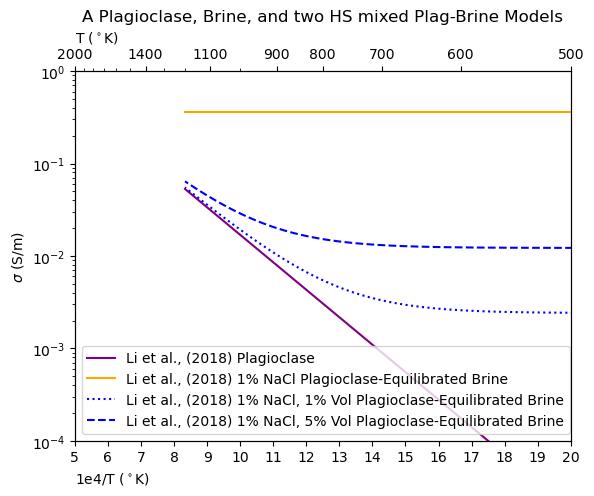

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pyrrhenius.mixing as pyhmix
import pyrrhenius.database as phsd
import pyrrhenius.utils as pyhutils

ecdatabase = phsd.Database()

# endmember models
brine_id = 'Li_18_1%plg_brine'
plag_id = 'Li_18_wet_plag'

brine_model = ecdatabase.get_model(brine_id)
plag_model  = ecdatabase.get_model(plag_id)

# The HashinStrikman mixing model needs to be initialized with a matrix and inclusion ecmodel
hashinshtrikman_matrix = pyhmix.HashinShtrikmanUpper(plag_model,brine_model)

# provide a range of temperature conditions at which to evaluate the models
T = np.linspace(400,1200,num=120)

# Only the HS model in this example requires a provided phase fraction (0.05), positional argument.
hs_5pct = hashinshtrikman_matrix.get_conductivity(0.05,T=T)
hs_1pct = hashinshtrikman_matrix.get_conductivity(0.01,T=T)

# Also calculate endmember phase conductivities for comparison
plagioclase_conductivity = plag_model.get_conductivity(T=T)
brine_conductivity        = brine_model.get_conductivity(T=T)

# set up matplotlib plotting

fig, ax = plt.subplots()
linear_major_ticks = np.asarray([2000,1400,1100,900,800,700,600,500,400])
pyhutils.format_ax_arrhenian_space(ax,linear_major_ticks=linear_major_ticks)

ax.plot(1e4/T,plagioclase_conductivity,color='purple',label='Li et al., (2018) Plagioclase')
ax.plot(1e4/T,brine_conductivity,color='orange',label='Li et al., (2018) 1% NaCl Plagioclase-Equilibrated Brine')
ax.plot(1e4/T,hs_1pct,color='blue',label='Li et al., (2018) 1% NaCl, 1% Vol Plagioclase-Equilibrated Brine',linestyle=':')
ax.plot(1e4/T,hs_5pct,color='blue',label='Li et al., (2018) 1% NaCl, 5% Vol Plagioclase-Equilibrated Brine',linestyle='--')
ax.set_title('A Plagioclase, Brine, and two HS mixed Plag-Brine Models')
ax.legend()
fig.show()